In [1]:
# !pip install ipython-autotime
%load_ext autotime

time: 0 ns (started: 2021-09-19 21:10:22 +08:00)


## Installing the required packages

In [ ]:
# !pip install transformers
# !pip install sentencepiece

In [ ]:
# !apt install neofetch

## Importing required libraries

In [ ]:
# !pip install torch

In [2]:
import pandas as pd
import os
import torch
from transformers import T5Tokenizer, T5ForConditionalGeneration
from transformers.optimization import  Adafactor 
import time
import warnings
warnings.filterwarnings('ignore')

time: 2.06 s (started: 2021-09-19 21:10:24 +08:00)


In [ ]:
# !neofetch

## Loading the processed data 

In [23]:
train_df=pd.read_csv(os.path.join('e2e-dataset','trainset.csv'))

time: 110 ms (started: 2021-09-19 21:21:51 +08:00)


In [24]:
train_df=train_df.sample(frac = 1)

time: 0 ns (started: 2021-09-19 21:21:53 +08:00)


In [25]:
train_df

,mr,ref
16908,"name[The Wrestlers], food[Italian], priceRange...","The Wrestlers is a moderately priced, moderate..."
28197,"name[Browns Cambridge], food[Chinese], priceRa...",Browns Cambridge is a cheap Chinese eatery wit...
18240,"name[The Plough], eatType[pub], food[Fast food...",The Plough is a fast-food pub near Café Rouge....
36001,"name[The Eagle], eatType[coffee shop], food[Ja...","An average rated, not child friendly coffee sh..."
14233,"name[The Olive Grove], eatType[pub], food[Fren...",One kid-friendly pub in the city centre is The...
...,...,...
17961,"name[The Wrestlers], eatType[coffee shop], foo...","The Wrestlers is a fast food, coffee shop loc..."
14562,"name[Bibimbap House], food[Japanese], priceRan...",Bibimbap House serves Japanese food. Their me...
5563,"name[Green Man], priceRange[high], area[rivers...",A children friendly place near the river side ...
32888,"name[The Plough], eatType[pub], food[English],...",The Plough is a family friendly pub located ri...


time: 0 ns (started: 2021-09-19 21:21:54 +08:00)


In [26]:
train_df.columns

Index(['mr', 'ref'], dtype='object')

time: 0 ns (started: 2021-09-19 21:21:57 +08:00)


In [27]:
batch_size=8
num_of_batches=len(train_df)/batch_size
num_of_epochs=4

time: 0 ns (started: 2021-09-19 21:22:02 +08:00)


In [28]:
num_of_batches=int(num_of_batches)

time: 0 ns (started: 2021-09-19 21:22:03 +08:00)


In [ ]:
# !pip install cloud-tpu-client==0.10 https://storage.googleapis.com/tpu-pytorch/wheels/torch_xla-1.9-cp37-cp37m-linux_x86_64.whl

In [ ]:
# #tpu

# # imports the torch_xla package
# import torch_xla
# import torch_xla.core.xla_model as xm

# dev = xm.xla_device(devkind='TPU')
# t1 = torch.ones(3, 3, device = dev)
# print(t1)

Checking for the GPU availability

In [ ]:
# !pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 torchaudio===0.9.0 -f https://download.pytorch.org/whl/torch_stable.html

In [10]:
import torch
import pycuda.driver as cuda
cuda.init()

torch.cuda.current_device()
cuda.Device(0).name()

'NVIDIA GeForce RTX 2080 SUPER'

time: 94 ms (started: 2021-09-19 21:15:29 +08:00)


In [ ]:
# !pip install pycuda

In [11]:
dev = torch.device("cuda") 

time: 0 ns (started: 2021-09-19 21:15:31 +08:00)


In [12]:
torch.cuda.is_available()

True

time: 0 ns (started: 2021-09-19 21:15:33 +08:00)


In [13]:
if torch.cuda.is_available():
    dev = torch.device("cuda") 
    print("Running on the GPU")
else:
    dev = torch.device("cpu")
    print("Running on the CPU")

Running on the GPU
time: 0 ns (started: 2021-09-19 21:15:35 +08:00)


## Loading the pretrained model and tokenizer

In [14]:
tokenizer = T5Tokenizer.from_pretrained('t5-base')
model = T5ForConditionalGeneration.from_pretrained('t5-base', return_dict=True)
#moving the model to device(GPU/CPU)
model.to(dev)

T5ForConditionalGeneration(
  (shared): Embedding(32128, 768)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 768)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=768, out_features=768, bias=False)
              (k): Linear(in_features=768, out_features=768, bias=False)
              (v): Linear(in_features=768, out_features=768, bias=False)
              (o): Linear(in_features=768, out_features=768, bias=False)
              (relative_attention_bias): Embedding(32, 12)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseReluDense(
              (wi): Linear(in_features=768, out_features=3072, bias=False)
              (wo): Linear(in_features=3072, out_features=768, bias=False)
              (dropout): Dr

time: 9.7 s (started: 2021-09-19 21:15:40 +08:00)


## Initializing the Adafactor optimizer with parameter values suggested for t5

In [15]:

optimizer = Adafactor(
    model.parameters(),
    lr=1e-3,
    eps=(1e-30, 1e-3),
    clip_threshold=1.0,
    decay_rate=-0.8,
    beta1=None,
    weight_decay=0.0,
    relative_step=False,
    scale_parameter=False,
    warmup_init=False
)

  






time: 0 ns (started: 2021-09-19 21:15:50 +08:00)


In [16]:

from IPython.display import HTML, display

def progress(loss,value, max=100):
    return HTML(""" Batch loss :{loss}
        <progress
            value='{value}'
            max='{max}',
            style='width: 100%'
        >
            {value}
        </progress>
    """.format(loss=loss,value=value, max=max))

time: 0 ns (started: 2021-09-19 21:15:50 +08:00)


In [17]:
num_of_epochs=1

time: 0 ns (started: 2021-09-19 21:15:50 +08:00)


## Training the model

In [29]:
#Sets the module in training mode
model.train()

loss_per_10_steps=[]
for epoch in range(1,num_of_epochs+1):
  print('Running epoch: {}'.format(epoch))
  
  running_loss=0

  out = display(progress(1, num_of_batches+1), display_id=True)
  for i in range(num_of_batches):
    inputbatch=['mr']
    labelbatch=['ref']
    new_df=train_df[i*batch_size:i*batch_size+batch_size]
    for indx,row in new_df.iterrows():
      input = row['mr'] 
      labels = row['ref']   
      inputbatch.append(input)
      labelbatch.append(labels)
    inputbatch=tokenizer.batch_encode_plus(inputbatch,padding=True,max_length=400,return_tensors='pt')["input_ids"]
    labelbatch=tokenizer.batch_encode_plus(labelbatch,padding=True,max_length=400,return_tensors="pt") ["input_ids"]
    inputbatch=inputbatch.to(dev)
    labelbatch=labelbatch.to(dev)

    # clear out the gradients of all Variables 
    optimizer.zero_grad()

    # Forward propogation
    outputs = model(input_ids=inputbatch, labels=labelbatch)
    loss = outputs.loss
    loss_num=loss.item()
    logits = outputs.logits
    running_loss+=loss_num
    if i%10 ==0:      
      loss_per_10_steps.append(loss_num)
    out.update(progress(loss_num,i, num_of_batches+1))

    # calculating the gradients
    loss.backward()

    #updating the params
    optimizer.step()
    
  running_loss=running_loss/int(num_of_batches)
  print('Epoch: {} , Running loss: {}'.format(epoch,running_loss))
  

Running epoch: 1


Epoch: 1 , Running loss: 0.7238193062552712
Running epoch: 2


Epoch: 2 , Running loss: 0.6400705039024988
Running epoch: 3


Epoch: 3 , Running loss: 0.6065568803142227
Running epoch: 4


Epoch: 4 , Running loss: 0.5823222888736006
time: 1h 18min 43s (started: 2021-09-19 21:22:09 +08:00)


## Plotting the loss over time

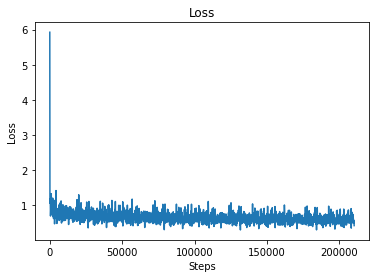

time: 938 ms (started: 2021-09-19 22:40:52 +08:00)


In [30]:
import matplotlib.pyplot as plt
   
steps = [i*100 for i in range(len(loss_per_10_steps))]
  
plt.plot(steps, loss_per_10_steps)
plt.title('Loss')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.show()

## Testing the model

In [31]:
model.eval()
input_ids = tokenizer.encode("WebNLG: sidharth | hometown | Delhi && sidharth | play |  football </s>", return_tensors="pt")  # Batch size 1
input_ids=input_ids.to(dev)
outputs = model.generate(input_ids)
tokenizer.decode(outputs[0])

'<pad> Midsummer House is a restaurant that serves Indian food. It is located in the city'

time: 9.66 s (started: 2021-09-19 22:40:53 +08:00)


Before testing the model further, lets learn how to serialize it and load from the path

## Serializing the trained model

In [32]:
torch.save(model.state_dict(),'pytorch_model_e2e_4epoch_1909.bin')


time: 1.33 s (started: 2021-09-19 22:41:03 +08:00)


## Downloading the config file

In [ ]:
# !wget https://s3.amazonaws.com/models.huggingface.co/bert/t5-base-config.json

## Loading the trained model from the path

In [33]:
model = T5ForConditionalGeneration.from_pretrained('pytorch_model_e2e_4epoch_1909.bin', return_dict=True,config='t5-base-config.json')


time: 4.33 s (started: 2021-09-19 22:42:09 +08:00)


In [34]:
model

T5ForConditionalGeneration(
  (shared): Embedding(32128, 768)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 768)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=768, out_features=768, bias=False)
              (k): Linear(in_features=768, out_features=768, bias=False)
              (v): Linear(in_features=768, out_features=768, bias=False)
              (o): Linear(in_features=768, out_features=768, bias=False)
              (relative_attention_bias): Embedding(32, 12)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseReluDense(
              (wi): Linear(in_features=768, out_features=3072, bias=False)
              (wo): Linear(in_features=3072, out_features=768, bias=False)
              (dropout): Dr

time: 15 ms (started: 2021-09-19 22:42:13 +08:00)


## The Inference function

In [52]:
# tokenizer = T5Tokenizer.from_pretrained('t5-base')

def generate(text):
  model.eval()
  input_ids = tokenizer.encode(text, return_tensors="pt")  # Batch size 1
  # input_ids.to(dev)
  s = time.time()
  outputs = model.generate(input_ids)
  gen_text=tokenizer.decode(outputs[0]).replace('<pad>','')
  elapsed = time.time() - s
  print('Generated in {} seconds'.format(str(elapsed)[:4]))

  
  return gen_text

time: 0 ns (started: 2021-09-19 22:48:28 +08:00)


# Now, Lets test it out !

In [53]:
generate(' Russia | leader | Putin')

Generated in 0.50 seconds


' The Cambridge Blue is a moderately priced restaurant that is family friendly.</s>'

time: 516 ms (started: 2021-09-19 22:48:30 +08:00)


## Results after quantization

In [54]:
import torch.quantization
import torch.nn as nn

quantized_model = torch.quantization.quantize_dynamic(
    model, {nn.Linear,nn.Dropout,nn.LayerNorm}, dtype=torch.qint8
)


time: 3.11 s (started: 2021-09-19 22:48:40 +08:00)


Lets check the difference in size of the model

In [38]:
def print_size_of_model(model):
    torch.save(model.state_dict(), "temp.p")
    print('Size (MB):', os.path.getsize("temp.p")/1e6)
    os.remove('temp.p')

print_size_of_model(model)
print_size_of_model(quantized_model)

Size (MB): 891.727295
Size (MB): 322.016761
time: 2.42 s (started: 2021-09-19 22:42:55 +08:00)


In [48]:
def quant_generate(text):
  quantized_model.eval()
  input_ids = tokenizer.encode(text, return_tensors="pt")  # Batch size 1
  # input_ids.to(dev)
  s = time.time()
  outputs = quantized_model.generate(input_ids)
  gen_text=tokenizer.decode(outputs[0]).replace('<pad>','')
  elapsed = time.time() - s
  print('Generated in {} seconds'.format(str(elapsed)[:4]))

  
  return gen_text

time: 0 ns (started: 2021-09-19 22:47:22 +08:00)


In [55]:
generate('name[Starbuck], eat type[coffee shop], priceRange[high]')

Generated in 0.62 seconds


' A coffee shop named The high price range is called the coffee shop, The high price range is'

time: 625 ms (started: 2021-09-19 22:48:44 +08:00)


In [56]:
quant_generate('name[Starbuck], eat type[coffee shop], priceRange[high]')

Generated in 0.99 seconds


'<pad> A high price ranged coffee shop is The Wrestlers.</s>'

time: 1 s (started: 2021-09-19 22:48:45 +08:00)
